# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


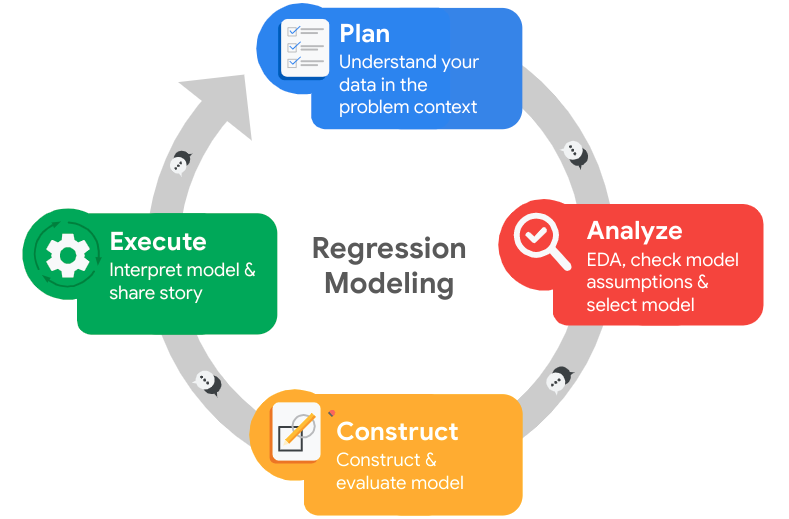

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* Data professionals, HR members, and leadership team are the stakeholders for this project.
* I'm trying to solve the employee turnover problem by using either a logistic regression model or the tree-based models to predict whether the employees will leave the company. By successfully developing a model and determine which factors lead to the turnover, it's easier for the company to discuss and develop strategies to try retaining them, and the company will save a lot of money for the hiring and training new employees in case the high rate of tunrover. 
* 
* Jupyter Notebook for Python coding.
* There is no ethical considerations in this stage.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [48]:
# Import packages
### YOUR CODE HERE ### 

# Operational packages
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for preprocessing, modeling, and evaluating
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, \
                            plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'Work_accident': 'work_accident',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.copy()
df1 = df1.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df1.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

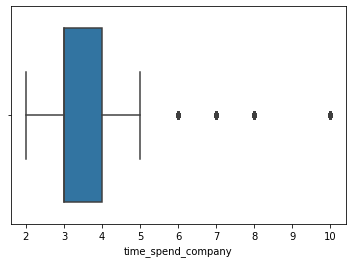

In [12]:
# Create a boxplot to visualize distribution of `time_spend_company` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df1['time_spend_company']);

In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Creating the iqr range (q1 = 25th percentile and q3 = 75th percentile)
q1 = df1['time_spend_company'].quantile(0.25)
q3 = df1['time_spend_company'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper limits
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Print out the lower and upper limits and number of rows that above the upper limit
print('Lower limit: ', lower)
print('Upper limit: ', upper)
print('Number of rows that above the upper limit are: ', len(df1[df1['time_spend_company'] > upper]))

Lower limit:  1.5
Upper limit:  5.5
Number of rows that above the upper limit are:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* It appears the unbalance between the staying and leaving rates of employees (83% vs. 17%). 
* Outliers appear and account pretty much in the dataset (either lower or upper the limits). 
* EDA process is important to understand the general and dive deeper into the dataset (computing stats, visualizations between variables, etc). Also, EDA helps to determine the model assumptions beforehand to check if they're all met the requirements. 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print('Number of employees left: \n', df1['left'].value_counts())
print('')
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print('Percentage of employees left: \n', df1['left'].value_counts(normalize=True))

Number of employees left: 
 0    10000
1     1991
Name: left, dtype: int64

Percentage of employees left: 
 0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [15]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


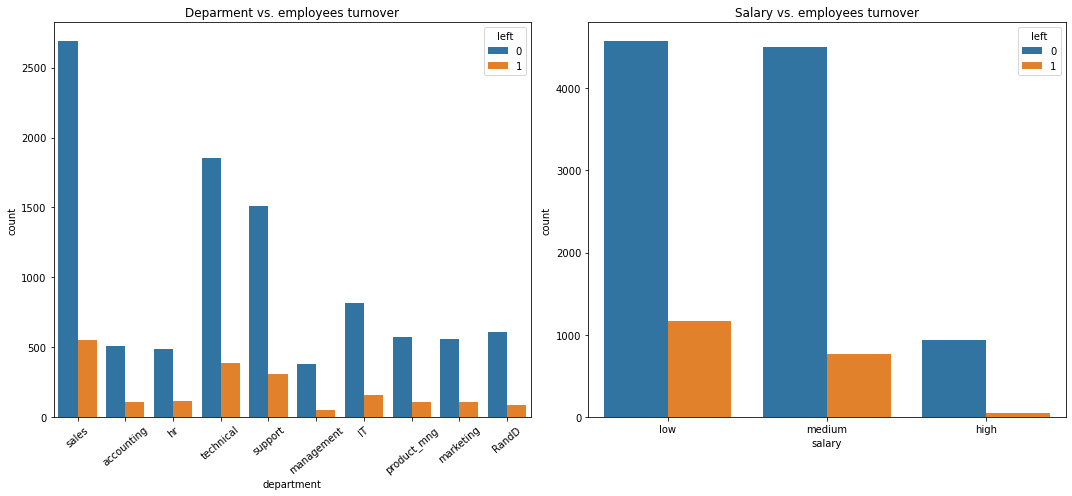

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Create two plots of department and salary to compare with the employees left. 
sns.countplot(data=df1, x='department', hue='left', ax=ax[0])
ax[0].set_title('Deparment vs. employees turnover')
labels = df1['department'].unique()
ax[0].set_xticklabels(labels, rotation=40)

sns.countplot(data=df1, x='salary', hue='left', ax=ax[1])
ax[1].set_title('Salary vs. employees turnover')

plt.tight_layout()
plt.show()

For both the plots, the percentage of employees leave doesn't account too much compared to the staying employees. 

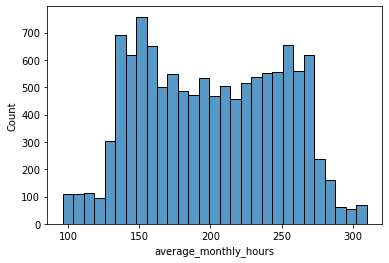

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
# Histogram of avg monthly working hours
sns.histplot(df1['average_monthly_hours']);

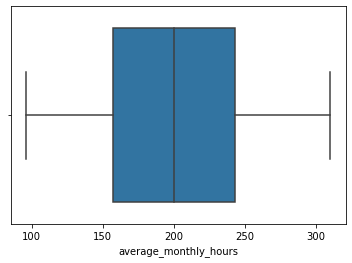

In [18]:
# Box plot
sns.boxplot(df1['average_monthly_hours']);

From both the plots, the average hours of working is ~200hrs/month, or 50hrs/week. The hours range are mainly concentrated between ~130 - ~270 hours. 

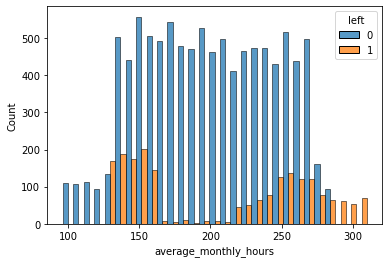

In [19]:
# Compare avg hours in month to the employee turnover
sns.histplot(data=df1, x='average_monthly_hours', hue='left', multiple='dodge');

From the plot, it might be clear that the more hours of working, the rate of employees leave gradually increases (at around ~220 hours = 55hrs/week). Another interesting notice is the rate of employees leave when their working hours are between ~130-160hrs (which is higher than the rate of higher working hours). 

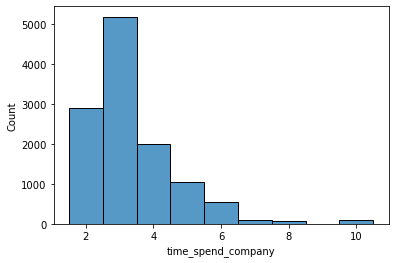

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a histogram for the years spend in the company of employees
sns.histplot(df1['time_spend_company'], discrete=True);

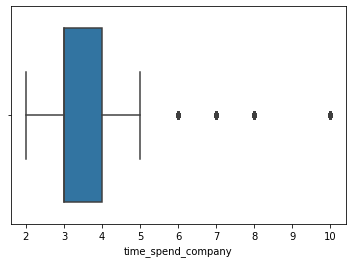

In [21]:
# Box plot
sns.boxplot(df1['time_spend_company']);

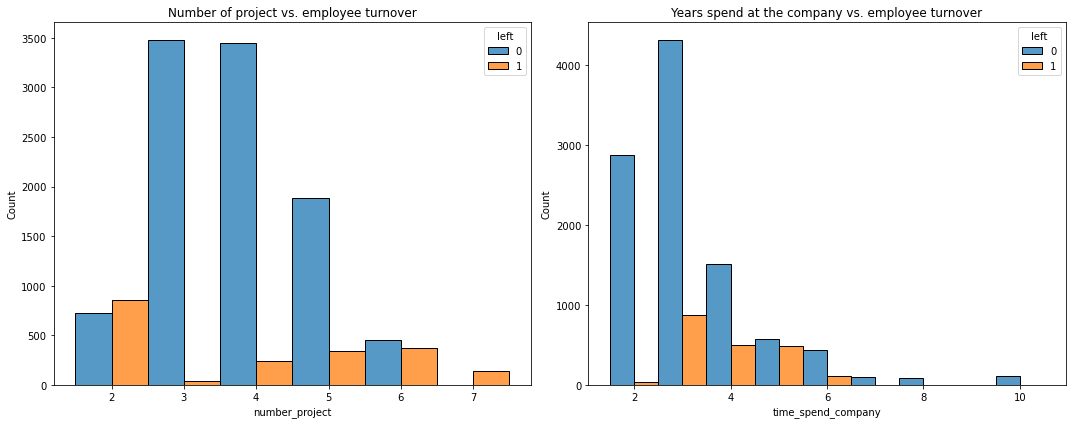

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot histograms of number of project and years spend at the company to the employee turnover
sns.histplot(data=df1, x='number_project', discrete=True, hue='left', multiple='dodge', ax=ax[0])
ax[0].set_title('Number of project vs. employee turnover')

sns.histplot(data=df1, x='time_spend_company', discrete=True, hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Years spend at the company vs. employee turnover')

plt.tight_layout()
plt.show()

* With the number of projects, employees choose to opt out if they're given pretty much in a month (with 6-7 projects having to do, they choose to leave the company). Notice is when they have just 2 projects to work in a month, the leaving rate is higher, which might be interesting. 
* With the years spend at the company, the rates of stay and leave of employees spend ~5yrs are almost equal to each other. 

In [23]:
# Determine the number of employees leave the company when given 7 projects to work 
len(df1[df1['number_project'] == 7])

145

In [24]:
# Check the number of stay vs. leave of the employees when given 2 projects
two_prj = df1[df1['number_project'] == 2]
two_prj['left'].value_counts()

1    857
0    725
Name: left, dtype: int64

When given 2 projects to work, 857 employees choose to leave the company, compared to 725 employees are staying. 

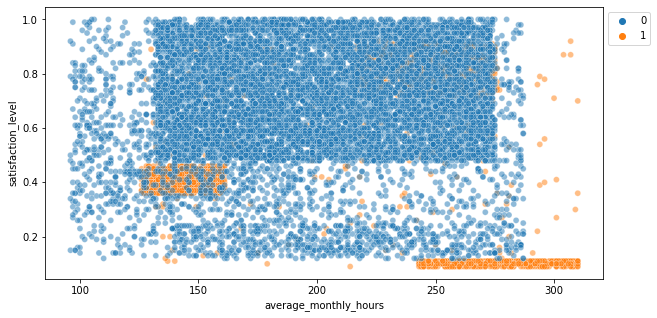

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create scatterplots of avg monthly hours with both the satisfaction level and last_evaluation
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.legend(bbox_to_anchor=(1, 1));

* Employees who left the company that work between ~240 - ~310hrs have the satisfaction level apprx. = 0, which migh reflect true about exhausted work hours during a month.
* Another interesting that the number of employees choose to leave in range about ~130 - ~160hrs have the satisfaction level < 0.5.
* The dense part which employees have working hours between ~140 - ~270hrs will keep staying at the company, and have the satisfaction level >= 0.5.

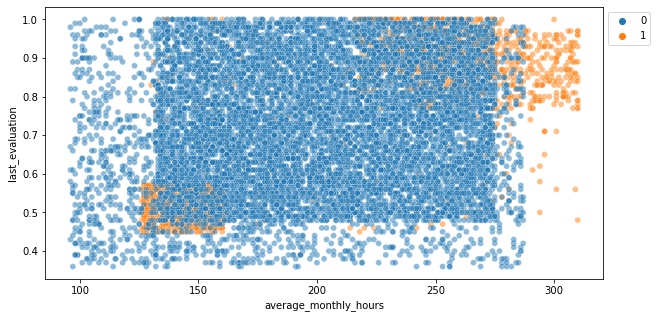

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.legend(bbox_to_anchor=(1, 1));

* The minor parts of employees (working hours between ~125-~160hrs) with the last evaluation < 0.6, as well as the employees have >~275hrs of work with the last evaluation >0.75 will choose to leave the company.

In [27]:
# Compare the employees turnover rate with the work accident and promotion last 5yrs
print(df1.groupby(['work_accident'])[['left']].size())
print('')
print(df1.groupby(['promotion_last_5years'])[['left']].size())

work_accident
0    10141
1     1850
dtype: int64

promotion_last_5years
0    11788
1      203
dtype: int64


The high percentage of employees choose to stay is higher than the leaving rate for both variables. 

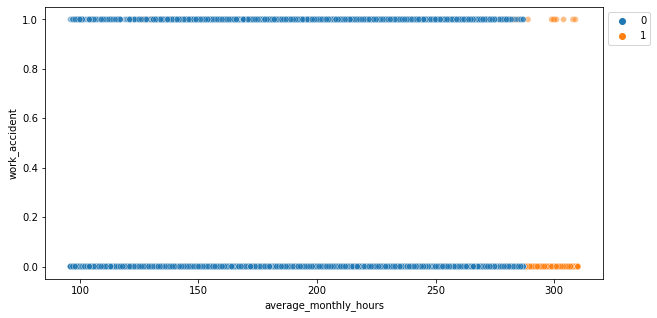

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='work_accident', hue='left', alpha=0.5)
plt.legend(bbox_to_anchor=(1, 1));

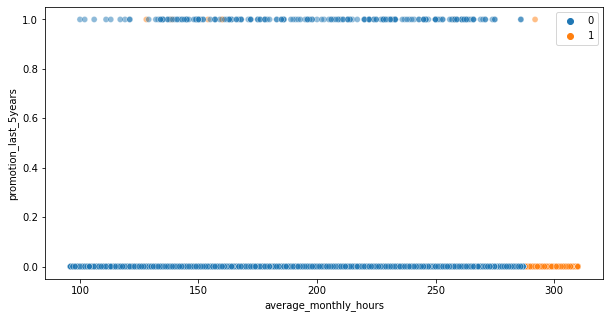

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5)
plt.legend(bbox_to_anchor=(1, 1));

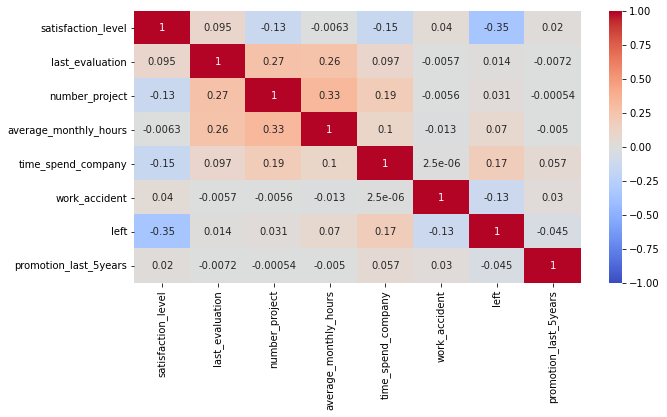

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###

# Heatmap of correlated variables to the target one (left)
plt.figure(figsize=(10, 5))
sns.heatmap(df1.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

We might clearly determine both the `average_monthly_hours` and `time_spend_company` are the variables that infuence the most to whether the employees will stay or leave. 

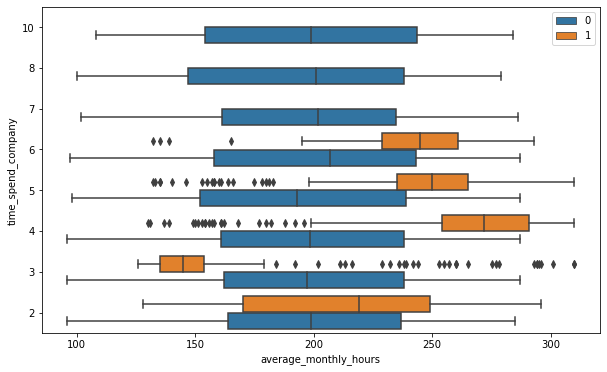

In [31]:
# Create a plot as needed
### YOUR CODE HERE ###

# Box plot of average_monthly_hours and time_spend_company to the employee turnover
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df1, x='average_monthly_hours', y='time_spend_company', hue='left', orient='h', ax=ax)
ax.invert_yaxis()
plt.legend(bbox_to_anchor=(1, 1));

* From 2-6 years, the more hours of working, the high potential employees will leave (compare the medians) as well as account for outliers which are less working hours. One interesting is in 3th year, the leaving rate is pretty low.
* From the 7th year and beyond, there's none in leaving rate of employees. 

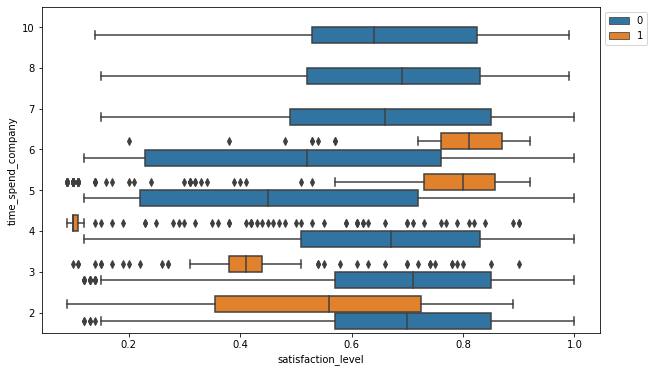

In [32]:
# Create a plot as needed
### YOUR CODE HERE ###
# Box plot of satisfaction level vs. years spend to the employee turnover
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df1, x='satisfaction_level', y='time_spend_company', hue='left', orient='h', ax=ax)
ax.invert_yaxis()
plt.legend(bbox_to_anchor=(1, 1));

* The satisfaction level dramatically drops from 2 to 4 years to the leaving employees, which in 4th year has the lowest level. From 5-6 years, it accounts for the high satisfaction level to the leaving rate of employees, but isn't that much. 
* Employees stay longer are satisfied with what they're doing and there's no accounted for any leaving employees.

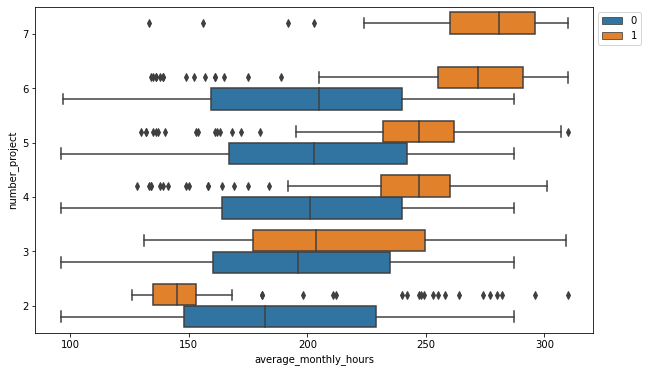

In [33]:
# Create a plot as needed
### YOUR CODE HERE ###
# Box plot of avg monthly hours vs. number of projects to the employee turnover
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax)
ax.invert_yaxis()
plt.legend(bbox_to_anchor=(1, 1));

The more projects and higher average hours of monthly works, the higher rate of employees choose to leave. Specifically, when given 7 projects, also accounted for ~275hrs working (median), employees absolutely choose to leave the company. 

In [34]:
# Calculate the mean of avg working hours of employees who have been accounted for 7 projects
df1[df1['number_project'] == 7]['average_monthly_hours'].mean()

275.62068965517244

### Insights

One thing stands out the most is that the longer hours of working on average monthly, the higher the turnover rate. The more projects being given to the employees, the higher potential they choose to opt out. Employees who have been at the company for a long time (apprx. >7yrs) have the turnover rate could be considered as minimal or none (i.e. they satisfy with their jobs). 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

In [35]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Identify the type of prediction task.

For this project, the task is to predict the binary outcomes, which is whether the employees will leave a company (based on the `left` column) from many variables include in the dataset such as `satisfaction_level`, `average_monthly_hours`, `time_spend_company`, etc. 

### Identify the types of models most appropriate for this task.

Logistic Regression could be an ideal approach since this model type works for binary outcomes. However, there are some assumptions that need to handel before constructing such as outliers, multicollinearity, etc. Another approach could be worked well is the tree-based models (Decision Tree or Random Forest), which these models can handel well of many assumptions from the logistic one. 

### Modeling

Add as many cells as you need to conduct the modeling process.

The first approach is the Logistic Regression. First, let's handel the object variabels (`department` and `salary`) since the machine learning model(s) can't work if includes the non-numeric variables. 
* For the `department`, we can create dummy variabels.
* For the `salary`, since this column forms as a hierachy order (low-medium-high), dummy variables might not a choice. Then, we might choose to ordinal ecoding (0-1-2). 

In [36]:
# Check the info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [37]:
# Encode both the department and salary column
df_encode = df1.copy()
df_encode['salary'] = df_encode['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df_encode = pd.get_dummies(df_encode)

In [38]:
df_encode.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Since the Logistic model could be affected by the outliers, we might choose to get rid of those from the `time_spend_company` column.

In [39]:
# Get rid of outliers that range the years spend between lower and upper limits
df_logistic = df_encode[(df_encode['time_spend_company'] >= lower) & (df_encode['time_spend_company'] <= upper)]
df_logistic.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0


In [40]:
# Define X and y variables to construct the model
X = df_logistic.copy()
X = X.drop('left', axis=1)

y = df_logistic['left']

In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [42]:
# CHeck the shape of training and test sets
X_train.shape, X_test.shape

((8375, 18), (2792, 18))

In [43]:
# COnstruct the Logisitc Regression
lr = LogisticRegression(penalty='none', max_iter=500, random_state=0)
lr.fit(X_train, y_train)

# Predict the test set
lr_pred = lr.predict(X_test)

In [44]:
# Get the scores of training and test sets
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8253134328358209
0.8270057306590258


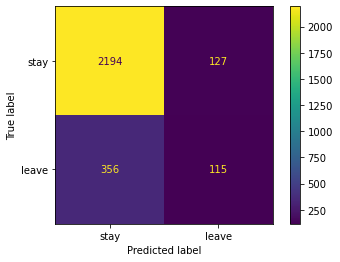

In [45]:
# Plot confusion matrix
plot_confusion_matrix(lr, X_test, y_test, display_labels=['stay', 'leave'], values_format='')

##### From the plot, there are metrics to consider:
* True positive: number of employees actually leave and the model correctly predicts (115).
* True negative: number of employees actually stay and the model correctly predicts (2194).
* False positive: number of employees actually stay but the model predicts as leave (127).
* False negative: number of employees actually leave but the model predicts as stay (356).
* Total employees actually stay is 2321, and the model incorrectly predicts 127.
* Total employees actually leave is 471, and the model incorrectly predicts 115.

It's might be clear to understand the dispropotional between stay & leave rates since the imbalance problem (which defined before of 83% stay vs. 17% leave). 

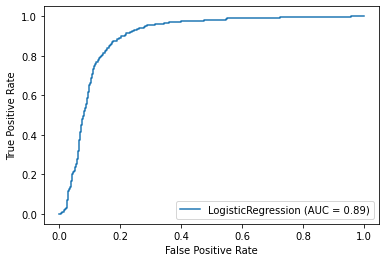

In [46]:
# Plot the roc-auc curve
plot_roc_curve(lr, X_test, y_test)

In [47]:
# Print classification report 
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2321
           1       0.48      0.24      0.32       471

    accuracy                           0.83      2792
   macro avg       0.67      0.59      0.61      2792
weighted avg       0.80      0.83      0.80      2792



##### From the classification report:
* The accuracy score is 83%, which the model correctly classifies the proportion of stay and leave employees. However, this score won't be much effective to use due to the imbalance class.
* The precision score is 48%, which is the proportion of actual leaving employees, out of the total that the model predicts as leave.
* The recall score is 24%, which is the proportion of model accurately predicts as leave, out of the total number of leaving employees.
* The F1 score is 32%, which is the harmonic mean of precision and recall.

In this case, logistic regression might not be an ideal choice. So then we'll chose the tree-based models to determine it they can boost the performance and results.

In [49]:
# Define the X and y variables for tree-based models
X = df_encode.copy()
X = X.drop('left', axis=1)

y = df_encode['left']

In [50]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [ ]:
# Check the shape of training and test sets
X_train.shape, X_test.shape

In [51]:
# Construct the Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict the test set
dt_pred = dt.predict(X_test)

In [52]:
# Get the scores of training and test sets
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.9653102068045364


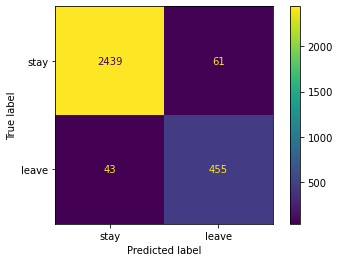

In [53]:
# Plot confusion matrix
plot_confusion_matrix(dt, X_test, y_test, display_labels=['stay', 'leave'], values_format='')

Compared to the Logistic model, this Decistion Tree performs pretty well, specifically the positive values, and the false predictions dramatically drop down. 

In [54]:
# Print classification report 
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2500
           1       0.88      0.91      0.90       498

    accuracy                           0.97      2998
   macro avg       0.93      0.94      0.94      2998
weighted avg       0.97      0.97      0.97      2998



All the four metrics score are way better, which account for ~90% and above. 

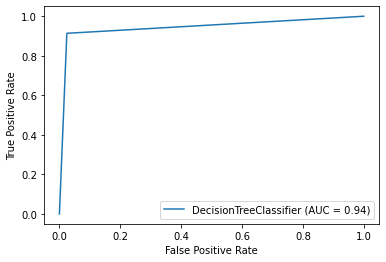

In [55]:
# Plot the roc-auc curve
plot_roc_curve(dt, X_test, y_test)

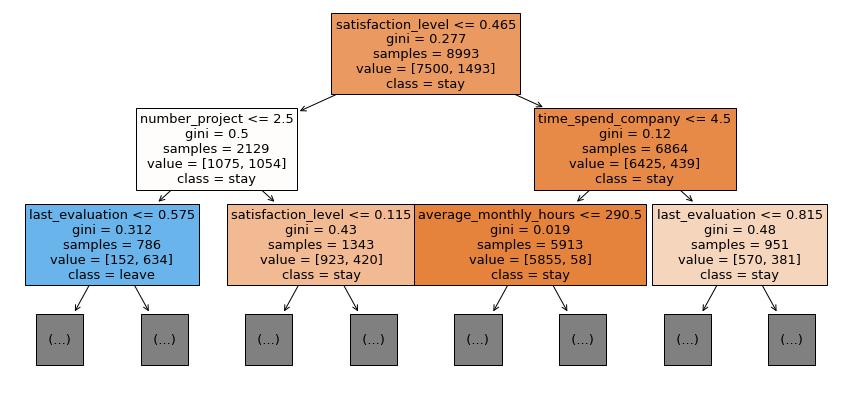

In [56]:
# Plot the tree
plt.figure(figsize=(15, 7))
plot_tree(dt, max_depth=2, feature_names=X.columns, class_names=['stay', 'leave'],
          fontsize=13, filled=True);

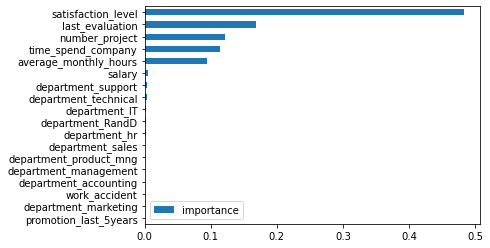

In [57]:
# Plot the feature importances
ft = pd.DataFrame(dt.feature_importances_, index=X.columns, columns=['importance']) \
     .sort_values('importance').plot.barh()

ft

It clearly determines that the `satisfaction_level`, `last_evaluation`, `number_project`, `time_spend_company`, and `average_monthly_hours` are the most influential variables to whether the employees will stay or leave the company.

In [58]:
# Construct the Random Forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Predict the test set
rf_pred = rf.predict(X_test)

In [59]:
# Get the scores of training and test sets
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.9833222148098733


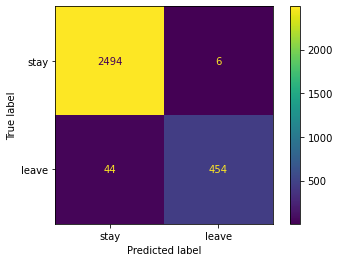

In [60]:
# Plot confusion matrix
plot_confusion_matrix(rf, X_test, y_test, display_labels=['stay', 'leave'], values_format='')

The predictions for this Random Forest model work as well as the Decision Tree, but the false predictions is much better which account for 50 in total (compared to 104 in Decision Tree model). 

In [61]:
# Print classification report 
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2500
           1       0.99      0.91      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



These metric scores are much better and higher than the Decision Tree model. 

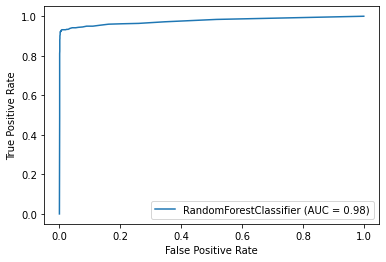

In [62]:
# Plot the roc-auc curve
plot_roc_curve(rf, X_test, y_test)

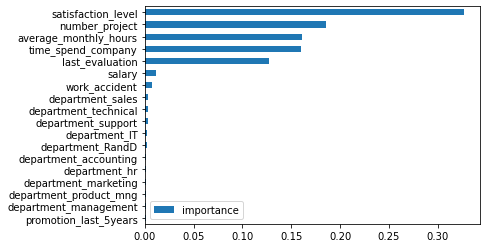

In [63]:
# Plot feature importances 
ft = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']) \
     .sort_values('importance').plot.barh()

ft

All the 5 most influential variables above are the same as from the Decision Tree model, except the order has been changed and the importance rate is shrinked a bit lower. 

In [64]:
# Construct the XGBoost model
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb.fit(X_train, y_train)

# Predict the test set
xgb_pred = xgb.predict(X_test)

In [65]:
# Get the scores of training and test sets
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.9957744912709885
0.980653769179453


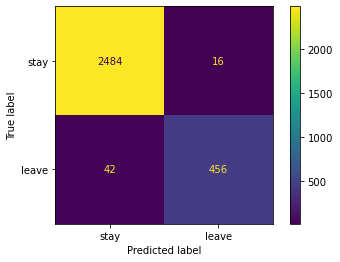

In [66]:
# Plot confusion matrix
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['stay', 'leave'], values_format='')

Compare to both the Decision Tree and Random Forest models before, this XGBoost performs better than the Decision Tree, but there's a small margin lower in false predictions and true predictions compared to the Random Forest. 

In [67]:
# Print classification report 
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2500
           1       0.97      0.92      0.94       498

    accuracy                           0.98      2998
   macro avg       0.97      0.95      0.96      2998
weighted avg       0.98      0.98      0.98      2998



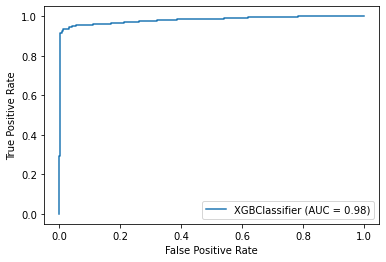

In [68]:
# Plot the roc-auc curve
plot_roc_curve(xgb, X_test, y_test)

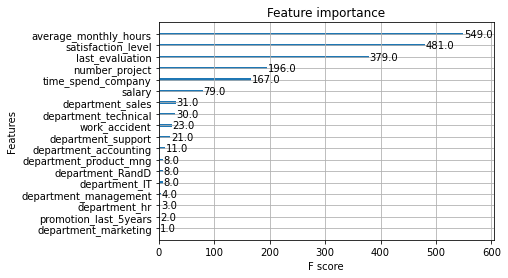

In [71]:
# Plot features importances 
plot_importance(xgb)

The top 5 features from the XGBoost model are the same as the Decision Tree and Random Forest models.

For now, we might want to perform hyperparameters tuning for the three the models to check if they can boost the results higher than the baseline models.

In [72]:
# Performing hyperparameters tuning for Decision Tree model
# Instantiate the model
dtc = DecisionTreeClassifier(random_state=0)

# Set the range of parameters 
cv_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Get the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Define the gridsearchcv 
dtc_cv = GridSearchCV(dtc, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [73]:
%%time
# Fit the training set
dtc_cv.fit(X_train, y_train)

CPU times: user 3.74 s, sys: 0 ns, total: 3.74 s
Wall time: 3.78 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                    

In [74]:
# Get the best score(avg roc-auc score from cross-validation) and params
print(dtc_cv.best_score_)
print(dtc_cv.best_params_)

0.9718207627213756
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [75]:
# Print out all the metric scores
def make_results(model_name, model_object):
    """
    Create a pandas df to print out the score metrics 
    from the cross-validation 
    
    Print out the mean accuracy, precision, recall, f1, and roc-auc scores
    
    """
    # Get the cv results and put in the df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Extract the row of best mean roc-auc score 
    best_estimator = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]
    
    # Extract other metrics from the same row
    roc_auc = best_estimator['mean_test_roc_auc']
    f1 = best_estimator['mean_test_f1']
    recall = best_estimator['mean_test_recall']
    precision = best_estimator['mean_test_precision']
    accuracy = best_estimator['mean_test_accuracy']
    
    # Create a table df to print results
    table = pd.DataFrame({'Model': [model_name],
                          'Roc-Auc': [roc_auc],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
        
    })
    
    return table

In [76]:
# Get the cv resutls
results = make_results('Decision Tree CV', dtc_cv)
results

,Model,Roc-Auc,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.971821,0.930537,0.915607,0.946024,0.977316


In [77]:
# Perform hyperparameters tuning for Random Forest model
# Instantiate the model
rfc = RandomForestClassifier(random_state=0)

# Set the range of parameters 
cv_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'max_samples': [0.7, 0.8]
}

# Get the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Define the gridsearchcv 
rfc_cv = GridSearchCV(rfc, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [78]:
%%time
# Fit the training set
rfc_cv.fit(X_train, y_train)

CPU times: user 11min 17s, sys: 0 ns, total: 11min 17s
Wall time: 11min 17s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [79]:
# Get the best score(avg roc-auc score from cross-validation) and params
print(rfc_cv.best_score_)
print(rfc_cv.best_params_)

0.9812780177025582
{'max_depth': 30, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [80]:
# Get the scores result and append to the table df along with the decision tree results
rfc_results = make_results('Random Forest CV', rfc_cv)
results = pd.concat([results, rfc_results], axis=0)
results

,Model,Roc-Auc,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.971821,0.930537,0.915607,0.946024,0.977316
0,Random Forest CV,0.981278,0.943112,0.905558,0.983997,0.981875


In [81]:
# Perform hyperparameters tuning for XGBoost model
# Instantiate the model
xgbc = XGBClassifier(objective='binary:logistic', random_state=0)

# Set the range of parameters 
cv_params = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'min_child_weight': [1, 5]
}

# Get the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Define the gridsearchcv 
xgb_cv = GridSearchCV(xgbc, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [82]:
%%time 

# Fit the training data
xgb_cv.fit(X_train, y_train)

CPU times: user 2min 17s, sys: 0 ns, total: 2min 17s
Wall time: 1min 9s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

In [83]:
# Get the best score(avg roc-auc score from cross-validation) and params
print(xgb_cv.best_score_)
print(xgb_cv.best_params_)

0.986180261572879
{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}


In [84]:
# Get the xgboost results 
xgb_results = make_results('XGBoost CV', xgb_cv)
results = pd.concat([results, xgb_results])
results

,Model,Roc-Auc,F1,Recall,Precision,Accuracy
0,Decision Tree CV,0.971821,0.930537,0.915607,0.946024,0.977316
0,Random Forest CV,0.981278,0.943112,0.905558,0.983997,0.981875
0,XGBoost CV,0.986180,0.944327,0.914933,0.975720,0.982097


Compare all the three models after tuning hyperparameters, XGBoost outperforms the other two by the higher in margin of roc-auc score.

In [85]:
# Use the best model to predict on the test set
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

In [86]:
# Print the score metrics of the test set
def get_test_scores(model_name, pred, test):
    """
    Print out the score metrics from the test set
    
    Print out the accuracy, precision, recall, f1, and roc-auc scores 
    and put in the table df
    """
    # Print out all the scores
    accuracy = accuracy_score(test, pred)
    precision = precision_score(test, pred)
    recall = recall_score(test, pred)
    f1 = f1_score(test, pred)
    roc_auc = roc_auc_score(test, pred)
    
    # Create a table df
    table = pd.DataFrame({'Model': [model_name],
                          'Accuracy': [accuracy],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Roc-Auc': [roc_auc]
        
    })
    
    return table

In [87]:
# Get the test score results
test_results = get_test_scores('XGBoost Test Scores', xgb_preds, y_test)
test_results

,Model,Accuracy,Precision,Recall,F1,Roc-Auc
0,XGBoost Test Scores,0.982989,0.978587,0.917671,0.94715,0.956835


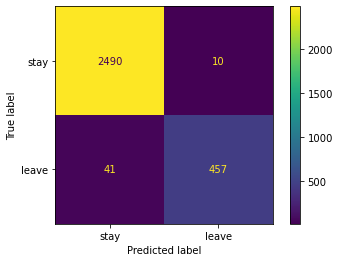

In [88]:
# Plot the confusion matrix
plot_confusion_matrix(xgb_cv.best_estimator_, X_test, y_test, 
                      display_labels=['stay', 'leave'], values_format='')

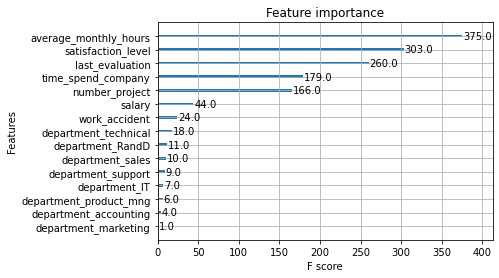

In [90]:
# Plot feature importances 
plot_importance(xgb_cv.best_estimator_)

All the top 5 features are the same as the baseline model, which are the most influential to determine whether the employees will stay or leave the company.

##### Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have `satisfaction levels` reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree, random forest, and xgboost models included all variables as features. This next round will incorporate feature engineering to build improved models.

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [95]:
# Create a new df and drop the satisfaction_level column
df2 = df_encode.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Suppose if we set employees who work 8hrs/day, 5days/week (40hrs), and 50 weeks/year (2,000 hrs) (exempt 2 weeks for vacation), we can estimate the mean working hours = 166,67/month (2,000/12months) 

We can defined `overworked` variable as a binary, which someone who works more than 175hrs/month

In [96]:
# Copy the average_monthly_hours to the overworked column and define the binary outcome
df2['overworked'] = df2['average_monthly_hours'].copy()
df2['overworked'] = np.where(df2['overworked'] > 175, 1, 0)

In [97]:
# Drop down the average_monthly_hours column
df2.drop('average_monthly_hours', axis=1, inplace=True)
df2.head()

,last_evaluation,number_project,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


We now want to do the 2nd round for hyperparameters tuning in each model.

In [98]:
# Define X and y 
X = df2.copy()
X = X.drop('left', axis=1)

y = df2['left']

In [99]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [100]:
# Performing hyperparameters tuning for Decision Tree model
# Instantiate the model
dtc2 = DecisionTreeClassifier(random_state=0)

# Set the range of parameters 
cv_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Get the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Define the gridsearchcv 
dtc2_cv = GridSearchCV(dtc2, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [101]:
%%time
# Fit the training model
dtc2_cv.fit(X_train, y_train)

CPU times: user 2.26 s, sys: 0 ns, total: 2.26 s
Wall time: 2.26 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                    

In [102]:
# Get the best score and params
print(dtc2_cv.best_score_)
print(dtc2_cv.best_params_)

0.9561998885172798
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [103]:
# Get the score results and print into the df
results2 = make_results('DTC2 CV', dtc2_cv)
results2

,Model,Roc-Auc,F1,Recall,Precision,Accuracy
0,DTC2 CV,0.9562,0.848649,0.864733,0.833968,0.948961


In [104]:
# Perform hyperparameters tuning for Random Forest model
# Instantiate the model
rfc2 = RandomForestClassifier(random_state=0)

# Set the range of parameters 
cv_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'max_samples': [0.7, 0.8]
}

# Get the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Define the gridsearchcv 
rfc2_cv = GridSearchCV(rfc2, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [105]:
%%time 
# Fit the training set
rfc2_cv.fit(X_train, y_train)

CPU times: user 10min 33s, sys: 461 ms, total: 10min 33s
Wall time: 10min 33s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [106]:
# Get the best score and params
print(rfc2_cv.best_score_)
print(rfc2_cv.best_params_)

0.9696137565187464
{'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [107]:
# Append the results
rfc2_res = make_results('RFC2 CV', rfc2_cv)
results2 = pd.concat([results2, rfc2_res])
results2

,Model,Roc-Auc,F1,Recall,Precision,Accuracy
0,DTC2 CV,0.956200,0.848649,0.864733,0.833968,0.948961
0,RFC2 CV,0.969614,0.890316,0.864679,0.917698,0.964638


In [108]:
# Perform hyperparameters tuning for XGBoost model
# Instantiate the model
xgbc2 = XGBClassifier(objective='binary:logistic', random_state=0)

# Set the range of parameters 
cv_params = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'min_child_weight': [1, 5]
}

# Get the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Define the gridsearchcv 
xgb2_cv = GridSearchCV(xgbc2, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [109]:
%%time
# Fit the training set
xgb2_cv.fit(X_train, y_train)

CPU times: user 2min 20s, sys: 763 ms, total: 2min 21s
Wall time: 1min 11s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

In [110]:
# Get the best score and params
print(xgb2_cv.best_score_)
print(xgb2_cv.best_params_)

0.9735262942096323
{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}


In [111]:
# Append the results
xgb2_res = make_results('XGB2 CV', xgb2_cv)
results2 = pd.concat([results2, xgb2_res])
results2

,Model,Roc-Auc,F1,Recall,Precision,Accuracy
0,DTC2 CV,0.956200,0.848649,0.864733,0.833968,0.948961
0,RFC2 CV,0.969614,0.890316,0.864679,0.917698,0.964638
0,XGB2 CV,0.973526,0.900994,0.890137,0.912148,0.967530


The scores drop down for all the models when we removed some features, but won't affect too much in general. The main metric score is the roc-auc one, and XGBoost model outperforms other two. 

In [112]:
# Predict the best model on the test set
xgb2_pred = xgb2_cv.best_estimator_.predict(X_test)

In [113]:
# Get the test scores
xgb2_test_scores = get_test_scores('XGB2 Test Scores', xgb2_pred, y_test)
xgb2_test_scores

,Model,Accuracy,Precision,Recall,F1,Roc-Auc
0,XGB2 Test Scores,0.965644,0.900609,0.891566,0.896065,0.935983


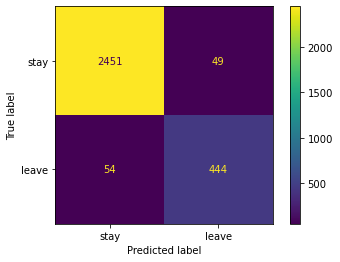

In [115]:
# Print the confusion matrix 
plot_confusion_matrix(xgb2_cv.best_estimator_, X_test, y_test, 
                      display_labels=['stay', 'leave'], values_format='')

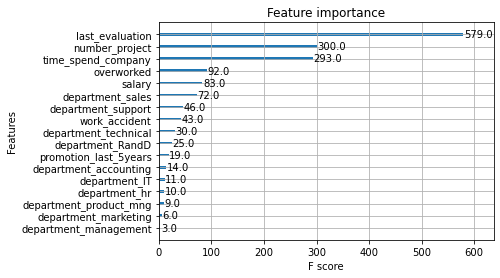

In [116]:
# Plot feature importances
plot_importance(xgb2_cv.best_estimator_)

`last_evaluation`, `number_project`, and `time_spend_company` are the most influential variables to the employee turnover rate

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

* Logisic Regression performs pretty bad in predictions. Specifically, the accuracy score is 83%, the precision score is 48%, the recall score is 24%, and the F1 score is 32%. The confusion matrix shows the disproportion rate of true and false predictions, due to the imbalanced class. 
* For the tree-based models, the XGBoost model outperforms the Decision Tree and Random Forest models, as well as the Logisic model. Specifically, the accuracy score is 97%, the precision score is 91%, the recall score is 89%, the F1 score is 90%, and the roc-auc score is 97%. The confusion matrix shows the increased in true positive prediction, and the lower rate in false predictions. Also, `last_evaluation`, `number_project`, and `time_spend_company` are the most influential features to determine whether an employee will leave the company.

### Conclusion, Recommendations, Next Steps

* There's an imbalance class between staying vs. leaving rate of employees (~83% vs. 17%). 
* The main concern leads to the employees turnover is about overworked, which they have to work quite amount of time during a month. The mean of working hours for employees ~200hrs/month, that can translate into 50hrs/week. Some employees have working hours beyond that, and that leads to the leaving rate increases. 
* Besdies longer working hours, more projects that employees have to handle (6-7) and years spend at the company (~4th-5thyrs), which these factors lead to the increased of employees turnover rate. Specifically, 145 employees will leave the company if they've been given 7 projects to work/month.
* Consider to reward employees who have worked for the quite amount of hours during a month, or reduce the amount of hours.
* Consider the appropriate # of projects given for employees, and the promotion for those who worked during the ~4th-5th years at the company.
* Make clear about the overtime hours and paying overtime policies to the employees who aren't quite familiar. 
* For the model's development, XGBoost could be a choice to deploy in production. `last_evaluation`, `number_project`, and `time_spend_company` are the most influential features to the employee turnover rate, and might want to further analyze through the EDA.
* There is concern about data leakage, which needs to address the data team.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.